# Implementing Back Propagation Algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## 1. Sigmoid and sigmoid derivative function


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

## 2. Initialization of neural network parameters

In [ ]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(35)
    W1 = np.random.randn(hidden_size, input_size).astype(float) * np.sqrt(2 / input_size)
    b1 = np.zeros((hidden_size, 1)).astype(float)
    W2 = np.random.randn(output_size, hidden_size).astype(float) * np.sqrt(2 / hidden_size)
    b2 = np.zeros((output_size, 1)).astype(float)
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

## 3. Implementing forward propagation function

In [ ]:
def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]
    Z1 = np.dot(W1, X.T) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
    return A1, A2

## 4. Implementing backpropagation function

In [ ]:
def backpropagation(X, y, A1, A2, parameters):
    m = X.shape[0]
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]

    dZ2 = A2 - y.T
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * sigmoid_derivative(A1)
    dW1 = (1 / m) * np.dot(dZ1, X)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

## 5. Implementing training function

In [ ]:
def train(X, y, input_size, hidden_size, output_size, learning_rate, num_epochs):
    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_list = []
    for epoch in range(num_epochs):
        A1, A2 = forward_propagation(X, parameters)
        gradients = backpropagation(X, y, A1, A2, parameters)

        parameters["W1"] -= learning_rate * gradients["dW1"]
        parameters["b1"] -= learning_rate * gradients["db1"]
        parameters["W2"] -= learning_rate * gradients["dW2"]
        parameters["b2"] -= learning_rate * gradients["db2"]

        loss = -np.sum(y * np.log(A2.T)) / X.shape[0]
        loss_list.append(loss)

    return parameters, loss_list

## 6. Implementing prediction function

In [ ]:
def predict(X, parameters):
    _, A2 = forward_propagation(X, parameters)
    return np.argmax(A2, axis=0)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1804032_Lab 05_Dataset.csv')
data = np.array(data)

X = data[:, :-1].astype(float)
y = data[:, -1]

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## 7. Splitting the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)


input_size = X_train.shape[1]
hidden_size = 7
output_size = y_train.shape[1]
learning_rate = 0.1
num_epochs = 1000

In [ ]:
trained_parameters, loss_list = train(X_train, y_train, input_size, hidden_size, output_size, learning_rate, num_epochs)

y_pred = predict(X_test, trained_parameters)  # Prediction on test set
y_pred_labels = label_encoder.inverse_transform(y_pred)

In [ ]:
print("Predicted Species:")
print(y_pred_labels)

y_test_labels = label_encoder.inverse_transform(np.argmax(y_test, axis=1))
print("Actual Species:")
print(y_test_labels)


Predicted Species:
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']
Actual Species:
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virgin

In [ ]:
def AccuracyCalculation(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_examples = y_true.shape[0]
    accuracy = correct_predictions / total_examples
    return accuracy*100

In [ ]:
accuracy = AccuracyCalculation(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

Accuracy: 86.66666666666667


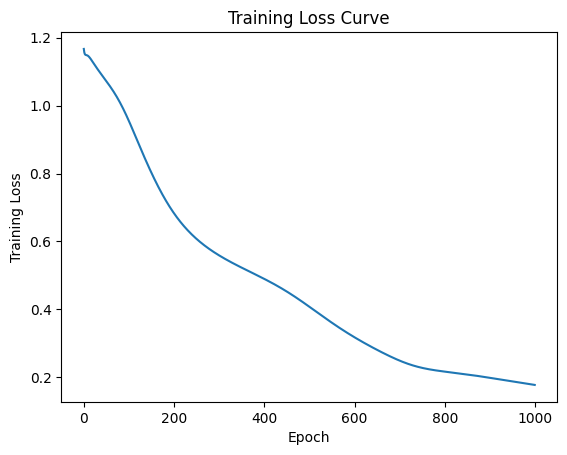

In [ ]:
plt.plot(range(num_epochs), loss_list)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Curve")
plt.show()